# Capstone Project - Car Accident Severity

## Introduction

In this part will be highlighting this Capstone Project to Car accident severity leveraging Cross-industry standard process for data mining phases. It is an initial phase to understand the project's objective from the business or application perspective. Then, you need to translate this knowledge into a machine learning problem with a preliminary plan to achieve the objectives.

Car accidents is one of the leafing deaths causes around the world and according to the World Health Organization, road traffic injuries caused an estimated 1.35 million deaths worldwide in the year 2016. Also, car accidents have number of consequences, ranging from minor property damages to the more severe loss of human lives. 

There are many studies on the factors causing traffic accidents. Also, it is very important is to determine what affect the level of severity of accidents. Additionally, it is also  imperative to understand what causes severe accidents so that targets, priorities strategies can be developed to reduce high severity accident occurrences first, as an efficient use of limited resources.

Having such insights, governments would be interested in accurate predictions of the severity of an accident and reduce high severity accidents by eliminating different factors which could be mitigatable and un-mitigatable.

## About the Dataset

Answering  questions on which factors affect the severity of accidents, collected data should include number of attributes such us the weather conditions, location, number and types of parties involved, other event factors and preferably the labelled data attribute of accident severity. Curent data is not fit for analysis. there are many columns that we will not use for our model. Also, most of the features are of type object, when they should be numerical type.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy import stats
from sklearn.metrics import jaccard_similarity_score, jaccard_score  
#from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

### Load Data From CSV File 

The dataset before clean-up

In [76]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)

## Normalize Data 

In [77]:
df.replace("Unknown", np.nan, inplace = True)
df["SPEEDING"].replace(np.nan, "N", inplace = True)
df.dropna(subset = ["X", "Y"], axis = 0, inplace = True)
df.dropna(subset = ["WEATHER", "ROADCOND"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
effects = df.copy(deep = True)

df.shape

(169126, 38)

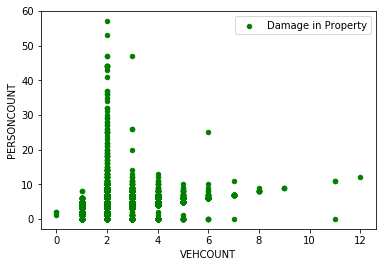

In [78]:
ax = df[df["SEVERITYCODE"] == 1].plot(kind = "scatter", x = "VEHCOUNT", y = "PERSONCOUNT", color = "green", label = "Damage in Property")
plt.show()

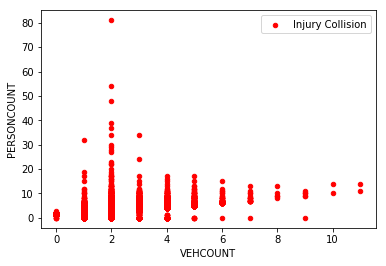

In [79]:
ax = df[df["SEVERITYCODE"] == 2].plot(kind = "scatter", x = "VEHCOUNT", y = "PERSONCOUNT", color = "Red", label = "Injury Collision")
plt.show()

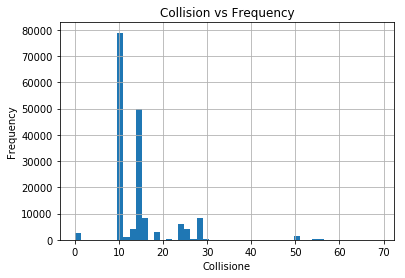

In [80]:
df.hist(column='SDOT_COLCODE', bins=50)
plt.title("Collision vs Frequency")
plt.xlabel("Collisione")
plt.ylabel("Frequency")
plt.show()

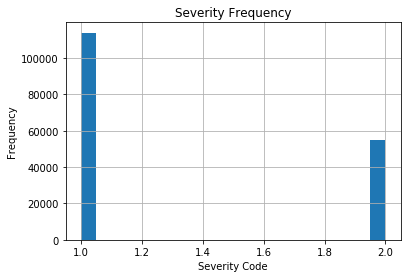

In [81]:
df.hist(column='SEVERITYCODE', bins=20)
plt.title("Severity Frequency")
plt.xlabel("Severity Code")
plt.ylabel("Frequency")
plt.show()

In [82]:
X= df[["VEHCOUNT", "PERSONCOUNT", "SDOT_COLCODE", "SEGLANEKEY"]].values
y = df["SEVERITYCODE"].values
print("Actual values of the test cases: " + str(y[0:20]))

Actual values of the test cases: [2 1 1 1 2 1 1 2 1 2 1 1 1 2 2 2 2 2 1 2]


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
scores = {}

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [84]:
k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    y_hat = KNN.predict(X_test)
    print("Test set Accuracy at K=", k, ": ", jaccard_score(y_test, knn_yhat))
    accuracy_score.append(jaccard_score(y_test, y_hat))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

NameError: name 'jaccard_score' is not defined

In [ ]:
k = 9
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
y_hat = KNN.predict(X)
print("Predicted values using k = 9: " + str(y_hat[0:20]))

In [ ]:
print("KNN F1-Score: " + str(f1_score(y, y_hat, average = "weighted")))
print("KNN Jaccard Score: " + str(jaccard_score(y, y_hat)))